<a href="https://colab.research.google.com/github/wldopie/ESAA/blob/main/HW_220415.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Chap 03. 평가**
  - **`분류`**의 **`성능 평가`** 지표
    - `정확도` (Accuracy)
    - `오차행렬` (Confusion matrix)
    - `정밀도` (Precision)
    - `재현율` (Recall)
    - `F1 스코어`
    - `ROC AUC`

### **01. 정확도 (Accuracy)** 
  - `실제 데이터에서 예측 데이터가 얼마나 같은지`를 판단하는 지표
  - 정확도 = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수
  - 정확도를 지표로 사용할 경우, `ML 모델의 성능을 왜곡`하는 경우가 종종 발생
    - 특히 `레이블 값의 분포가 불균형`한 경우, `적합하지 않은 평가 지표`로 작용

In [3]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  # fit() 메서드는 아무것도 학습하지 않음
  def fit(self, X, y=None):
    pass

  # predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함
  def predict(self, X):
    pred = np.zeros((X.shape[0], 1))
    for i in range(X.shape[0]):
      if X['Sex'].iloc[i] == 1:
        pred[i] = 0

      else:
        pred[i] = 1

    return pred

In [4]:
# 위에서 생성된 MyDummyClassifier를 이용해 타이타닉 생존자 예측 수행
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 생성된 MyDummyClassifier를 이용해 타이타닉 생존자 예측 수행

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

## 머신러닝에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

## Label Encoding 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

## 앞에서 실행한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size = 0.2, random_state = 0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


> **`정확도 평가 지표의 맹점`**을 보여주는 예시

- 데이터의 `분포도가 균일하지 않으면`, 아무것도 하지 않고 `무조건 특정 결과로만 분류하더라도 정확도가 높게 측정`될 수 있음.

In [5]:
# 불균형한 데이터 세트와 Dummy Classifier 생성
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score

class MyFakeClassifier(BaseEstimator):
  def fit(self, X, y):
    pass

  # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
  def predict(self, X):
    return np.zeros((len(X),1), dtype = bool)

# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [6]:
# 불균형한 데이터로 생성한 y_test의 분포도 확인, MyFakeClassifier를 이용해 예측, 평가 수행
## 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

## Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는: {0:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는: 0.900


---

### **02. 오차 행렬 (Confusion Matrix)**
  - **`4분면 행렬`**에서 `실제 레이블 클래스 값`과 `예측 레이블 클래스 값이 어떠한 유형을 가지고 매핑`되는지를 나타내는 지표
    - **`TN`**(True Negative) : `실제값 0`, `예측값 0`
    - **`FP`**(Fake Positive) : `실제값 0`, `예측값 1`
    - **`FN`**(Fake Negative) : `실제값 1`, `예측값 0`
    - **`TP`**(True Positive) : `실제값 1`, `예측값 1`

  - 정확도 = (TN + TP) / (TN + FP + FN + TP) 로 재정의

In [7]:
# MyFakeClassifier 예측 결과인 fakepred와 실제 결과인 y_test를 confusion_matrix()의 인자로 입력해 오차행렬을 출력
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

---

### **03. 정밀도와 재현율 (Precision & Recall)**
  - **positive** 데이터 세트의 **예측 성능에 초점**을 맞춘 평가 지표
  - **`정밀도`** (Precision)
    - TP / (TP + FP)
    - **`예측을 positive`**로 한 대상 중, `예측과 실제값이 positive로 일치`한 데이터의 비율
    - 실제 negative인 데이터 예측을 positive로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우, 더 중요한 지표로 작용
      - ex. 스팸메일의 분류 
  - **`재현율`** (Recall)
    - TP / (TP + FN)
    - **`실제값이 positive`**인 대상 중, `예측과 실제값이 positive로 일치`한 데이터의 비율
    - 실제 positive인 데이터 에측을 negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우, 더 중요한 지표로 작용
      - ex. 암 판단 모델, 금융 사기 적발 모델 등


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size = 0.20, random_state = 11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### **a. 정밀도/재현율 트레이드오프**
  - **`predict_proba()`** : 개별 데이터별로 `예측 확률을 반환`하는 메서드
    - 이처럼 사이킷런은 `분류 결정 임계값을 조절`해 `정밀도와 재현율의 성능 수치`를 상호 보완적으로 `조정`

In [10]:
# predict_proba() vs. predict()
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결과값 array를 병합해 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46191519 0.53808481]
 [0.878675   0.121325  ]
 [0.87716185 0.12283815]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46191519 0.53808481 1.        ]
 [0.878675   0.121325   0.        ]
 [0.87716185 0.12283815 0.        ]]


In [11]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [12]:
# 위의 Binarizer 함수를 이용해 사이킷런의 의사코드 설정
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값 (분류 결정 임계값)
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)      # 임계값을 0.5로 설정한 결과는 앞의 지표 값과 정확히 동일

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


In [13]:
# 만약 임계값을 낮추면 어떻게 될까?
# Binarizer의 threshold 설정값을 0.4로 설정, 즉 분류 결정 임계값을 0.5에서 0.4로 낮춤
custom_threshold = 0.4

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)      # 임계값을 낮추니 정밀도가 낮아지고 재현율이 증가함.

오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361




    Q. 임계값을 낮추면 정밀도는 낮아지고 재현율은 증가하는 이유?
      - 정밀도 = TP / (TP + FP), 재현율 = TP / (TP + FN)이므로 FP와 FN을 비교한다.
        - 임계값을 낮추게 되면, 0.4만 넘어도 1로 분류하게 되므로 1로 잘못 분류하게 되는 경우(FP)가 증가하게 된다.
        - 반면, 0으로 잘못 분류하게 되는 경우(FN)는 줄어들게 된다.
        
      - 즉, FP는 증가하고 FN은 감소하므로, 임계값이 낮아지면 정밀도는 분모가 커지므로 감소하고, 재현율은 분모가 작아지므로 증가한다.  


In [14]:
# 테스트를 수행할 모든 임계값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  # thresholds list객체 내의 값을 차례로 iteration하면서 Evaluation 수행
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임계값:', custom_threshold)
    get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

임계값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361
임계값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033
임계값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869
임계값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541
임계값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377


> **`precision_recall_curve()`** : `임곗값별 정밀도와 재현율`을 출력하는 메서드

In [16]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 Shape : ', thresholds.shape)

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임계값을 15 step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개 :', thr_index)
print('샘플용 10개의 임계값 :', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도 :', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율 :', np.round(recalls[thr_index], 3))

반환된 분류 결정 임계값 배열의 Shape :  (143,)
샘플 추출을 위한 임계값 배열의 index 10개 : [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값 : [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도 : [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율 : [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


> 임계값이 증가할수록 정밀도 값은 높아지나, 재현율 값은 낮아짐을 알 수 있다.

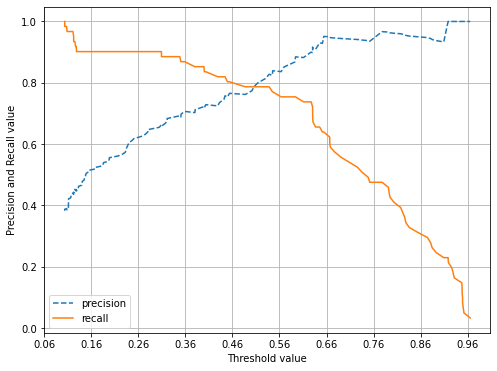

In [18]:
# 정밀도와 재현율 곡선의 시각화
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행 (정밀도는 점선으로 표시)
  plt.figure(figsize = (8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')

  # threshold 값 X축의 Scale을 0.1단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  # x축, y축 label과 legend, grid 설정
  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

#### **b. 정밀도와 재현율의 맹점**
  - Positive 예측의 `임계값을 변경함에 따라 정밀도와 재현율의 수치가 변경`되므로, 업무 환경에 맞게 `두 개의 수치를 상호보완할 수 있는 수준`에서 적용해야 한다.

---

### **04. F1 스코어**
  - `정밀도와 재현율을 결합`한 지표
  - 정밀도와 재현율이 `어느 한 쪽으로 치우치지 않는 수치`를 나타낼 때 상대적으로 `높은 값`을 가짐
  - F1 = (2 * 정밀도 * 재현율) / (정밀도 + 재현율)

In [19]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('f1 스코어: {0:.4f}'.format(f1))

f1 스코어: 0.7805


In [21]:
# 임계값을 변화시키면서 F1 스코어를 포함한 평가 지표를 확인
def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)

  # F1 스코어 추가
  f1 = f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)

  # f1 score print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.5, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

임계값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361, F1: 0.7727
임계값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1: 0.7840
임계값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1: 0.7805
임계값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1: 0.7931
임계값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1: 0.8036


> F1 스코어는 임계값이 0.6일 때 가장 좋으나, 재현율이 크게 감소하고 있으므로 주의가 필요하다.

---

### **05. ROC 곡선과 AUC**
  - `ROC 곡선` : **`FPR`**(False Positive Rate)을 X축, **`TPR`**(True Positive Rate)을 Y축으로 설정하여 `FPR의 변화에 따른 TPR의 변화를 나타내는 곡선`
    - X축 : 1-Specificity 
    - Y축 : Sensitivity (=Recall)

In [22]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임계값을 5 step으로 추출
# thresholds[0]은 max(예측확률)+1로 임의 설정, 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index :', thr_index)
print('샘플 index로 추출한 임계값 :', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값별 FPR :', np.round(fprs[thr_index], 3))
print('샘플 임계값별 TPR :', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index : [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임계값 : [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임계값별 FPR : [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임계값별 TPR : [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


> 임곗값이 1에 가까운 값에서 점점 작아지면서, FPR은 조금씩 커지고 TPR은 가파르게 증가한다.

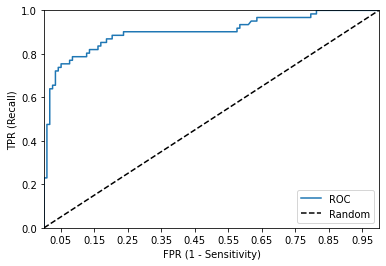

In [23]:
# FPR의 변화에 따른 TPR의 변화를 ROC 곡선으로 시각화
def roc_curve_plot(y_test, pred_proba_c1):
  # 임계값에 따른 FPR, TPR 값을 반환
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
  # ROC 곡선을 그래프 곡선으로 추가
  plt.plot(fprs, tprs, label = 'ROC')
  # 가운데 대각선 직선 추가
  plt.plot([0,1], [0,1], 'k--', label = 'Random')

  # FPR X축의 Scale을 0.1 단위로 변경, X,Y축 명 설정 등
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))
  plt.xlim(0,1); plt.ylim(0,1)
  plt.xlabel('FPR (1 - Sensitivity)'); plt.ylabel('TPR (Recall)')
  plt.legend()

roc_curve_plot(y_test, pred_proba[:, 1])

> **`ROC 곡선`** : `FPR과 TPR의 상대적인 변화`를 확인하는 용도

> **`AUC`** (Area Under Curve) : 분류의 성능 지표로 사용
  - `ROC 곡선 밑의 면적`을 구한 것으로서, `1에 가까울수록 좋은 수치`

In [24]:
# AUC 값 확인
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

ROC AUC 값 : 0.9024


In [25]:
# get_clf_eval 함수에 AUC 값을 측정하는 로직을 추가하여, 성능 평가 지표를 모두 포함하는 함수를 생성
def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  
  # ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)

  # ROC-AUC print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))